# Online Payment Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\John\\Downloads\\Online_Fraud_payment_Detection_C_P-2'

In [2]:
df=pd.read_csv(r"C:\Users\John\Downloads\Online_Fraud_payment_Detection_C_P-2\Dataset\OnlinePaymentFraudDetection.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Basic Understanding of the data

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.describe(include="object")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [9]:
for i in df.columns:
    print(i,"Value_counts::",df[i].value_counts())
    print("\n")

step Value_counts:: step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


type Value_counts:: type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


amount Value_counts:: amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
147631.41         1
239653.56         1
95994.69          1
373926.45         1
33313.71          1
Name: count, Length: 5316900, dtype: int64


nameOrig Value_counts:: nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1970706589    1
C40604503      1
C1614818636    1
C2089752665    1
C154988899     1
Name: count, Length: 6353307, dtype: int64


oldbalanceOrg Value_counts:: oldbalanceOrg
0.00         2102449
184.00         

#### The target variable "isFraud" highly imbalanced.

# EDA and Preprocessing

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
a=df["nameDest"].mode()[0]

In [12]:
df["nameDest"].fillna(a,inplace=True)

In [13]:
b=df["newbalanceDest"].mean()
b

np.float64(1224996.3982019299)

In [14]:
df["newbalanceDest"].fillna(b,inplace=True)

### Dropping nulls thatare very less 

In [15]:
df.dropna(inplace=True)

### Dropping duplicates

In [16]:
df.duplicated().sum()

np.int64(0)

### Removing noise from the data

In [17]:
df1=df
df11 = df1[(df1['amount'] > df1['oldbalanceOrg']) & (df1['type'] != 'CASH_IN') & (df1['isFraud']!=1)]
df11

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.00,0.00,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.00,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.00,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,51513.44,0,0
16,1,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.0,M675916850,0.00,0.00,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.0,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.0,C1515639522,24893.67,211167.51,0,0


lets drop the noise

In [18]:
df2=df1.drop(df11.index)

In [19]:

df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Now after removing noise my dataset has 2761105 rows

Lets clean the noise further

In [20]:
df22=pd.DataFrame(df2)
res_df= df22[(df22['oldbalanceDest']>df22['newbalanceDest']) & (df2['isFraud']!=1)]
res_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0
59,1,DEBIT,5529.13,C867288517,8547.0,3017.87,C242131142,10206.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362243,718,CASH_IN,236545.64,C1232273357,42582.0,279127.64,C146554741,8281.12,0.00,0,0
6362271,718,CASH_IN,27919.60,C562982749,2413.0,30332.60,C240654881,512791.59,484871.98,0,0
6362279,718,CASH_IN,78988.38,C886862695,204464.0,283452.38,C262804200,108724.19,29735.81,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.0,81409.26,C204102272,28088.61,10088.34,0,0


In [21]:
final_df = df22.drop(res_df.index)
final_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Now, our final cleaned data consists of 1559579 rows of data

In [22]:
final_df=final_df.reset_index(drop=True)

In [23]:
final_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1559574,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
1559575,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
1559576,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
1559577,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Dropping columns nameOrig and nameDest because names does not influence our predictions

In [24]:
final_df.drop(["nameOrig","nameDest"],axis=1,inplace=True)

## EDA

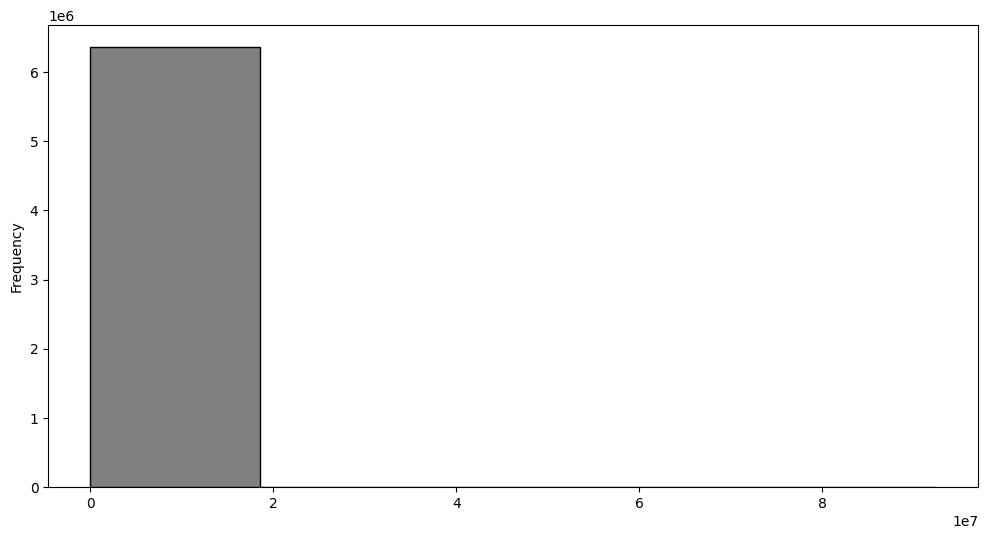

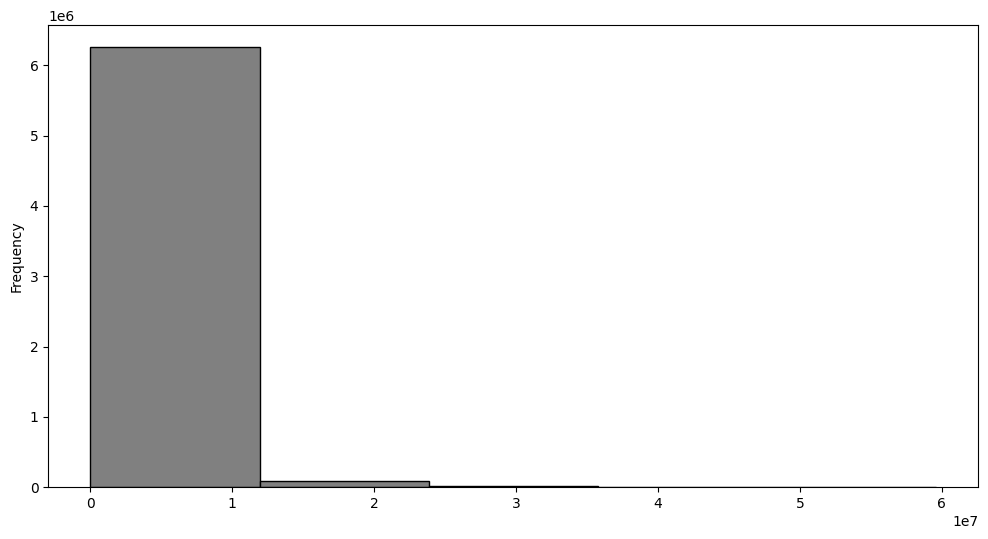

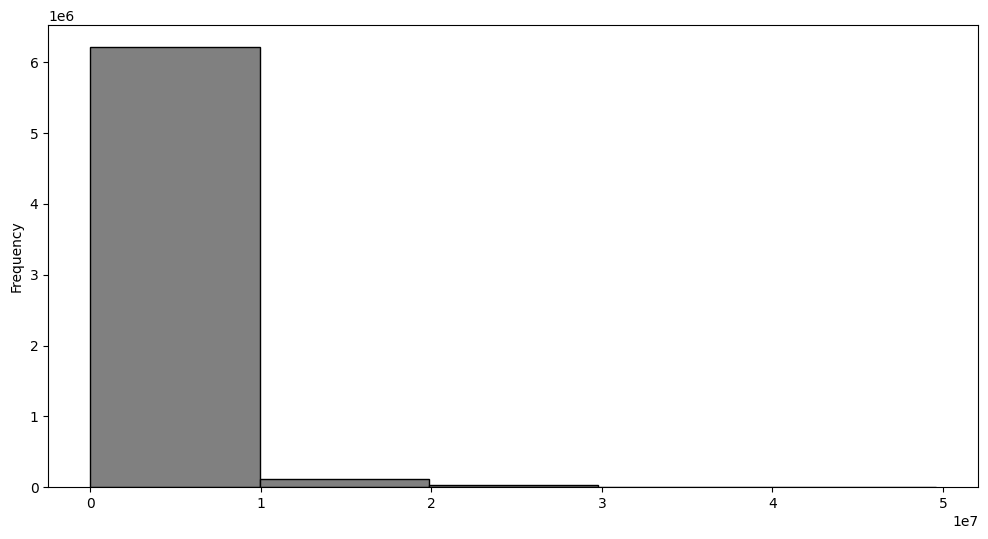

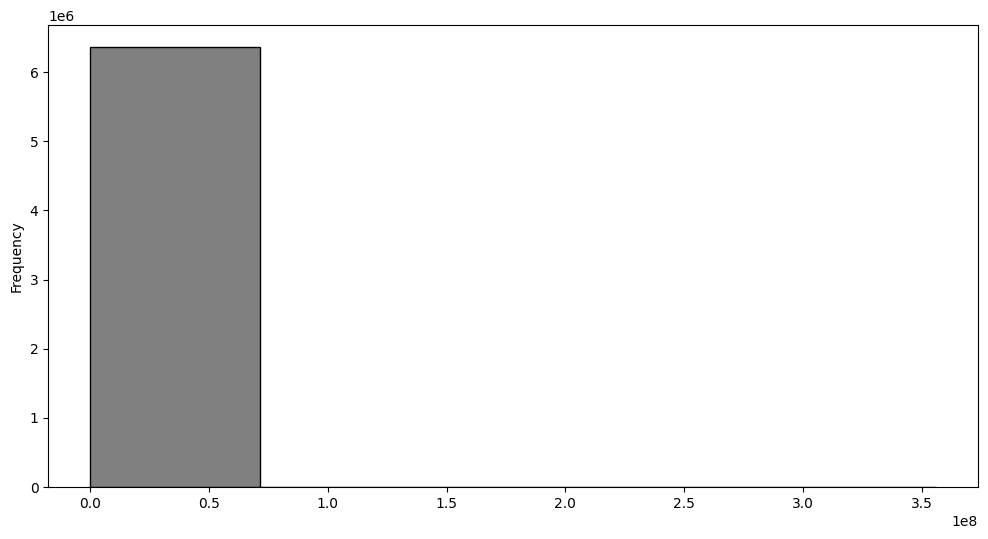

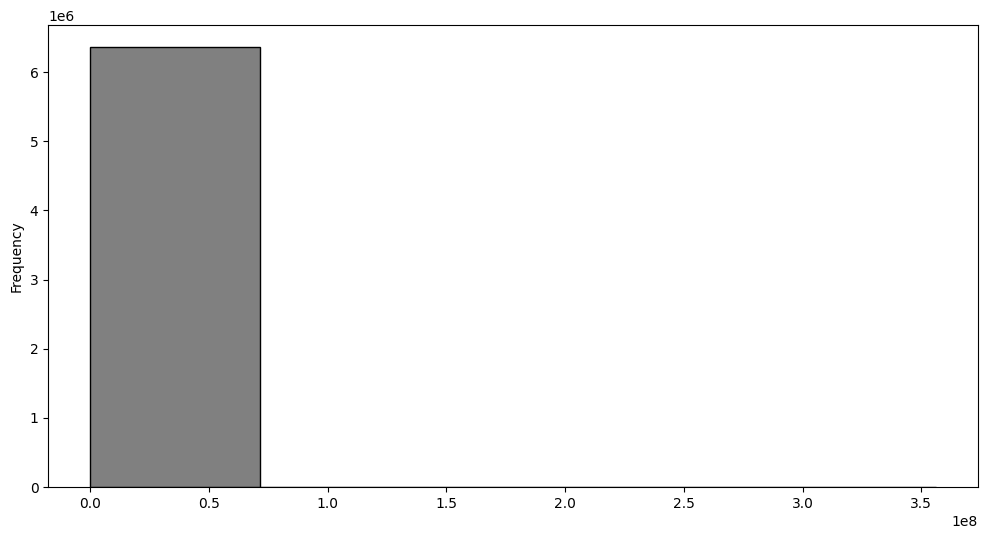

In [25]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

We could see some outliers Lets work on it

In [26]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




We'll remove the outliers

In [27]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




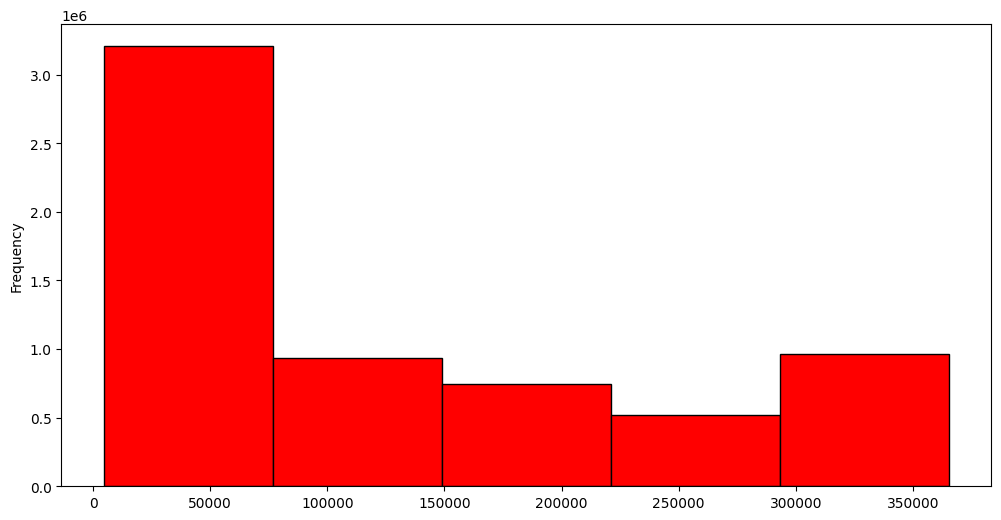

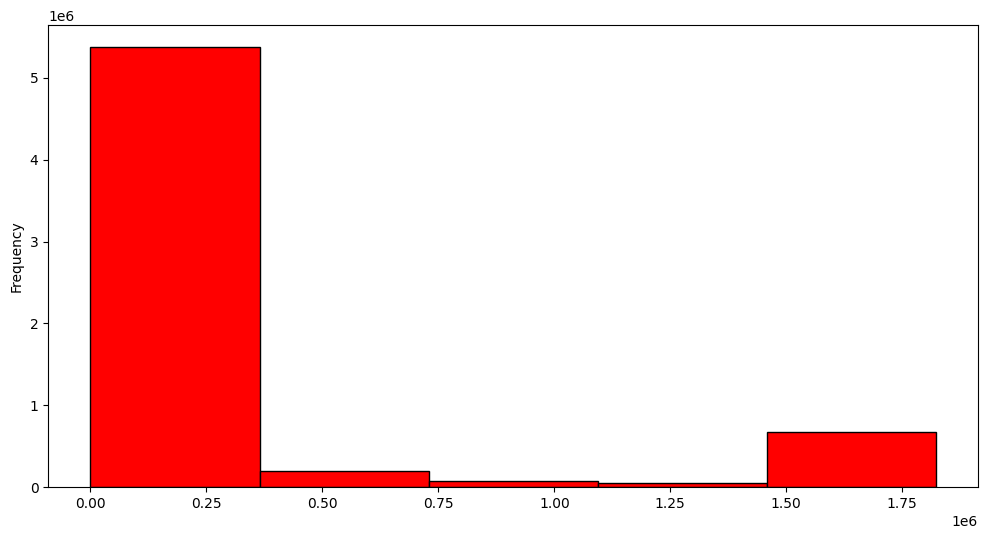

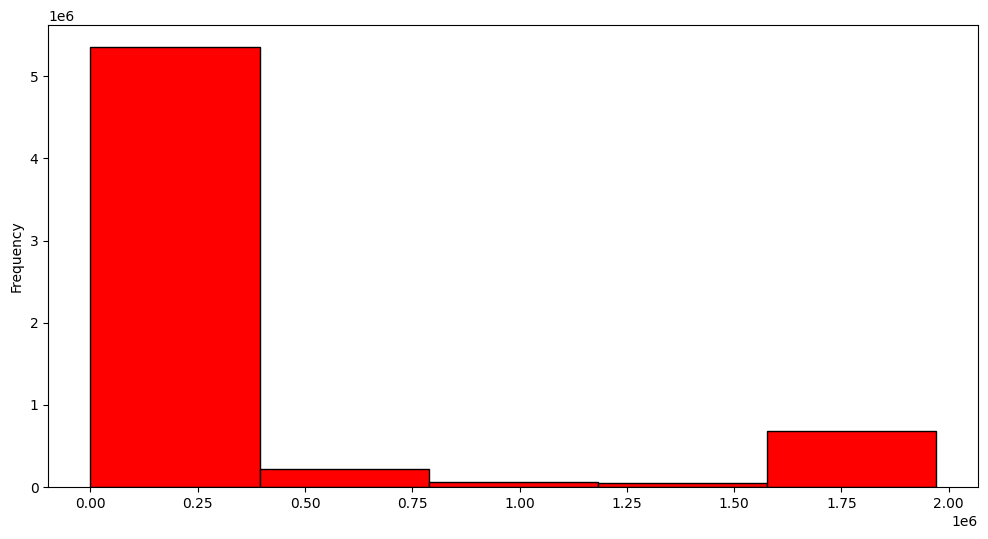

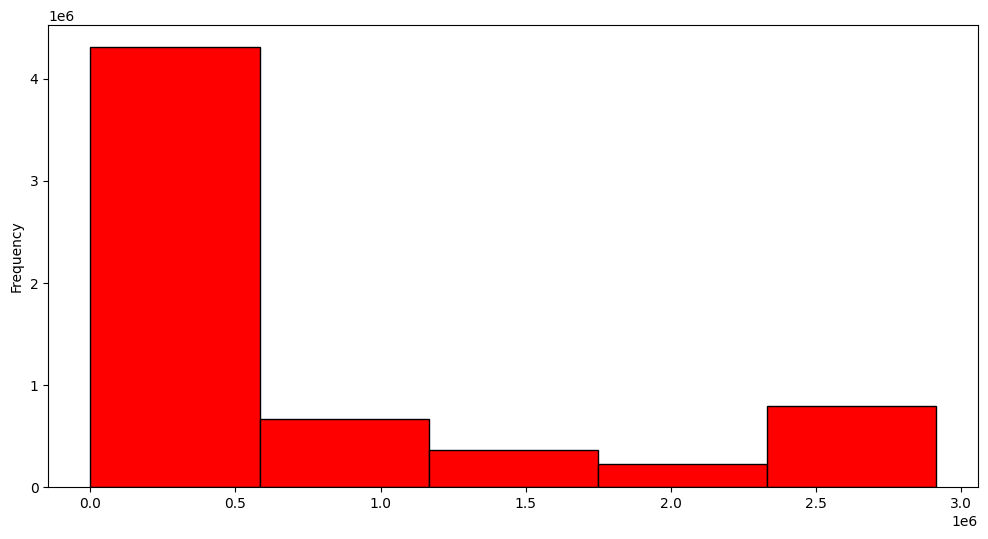

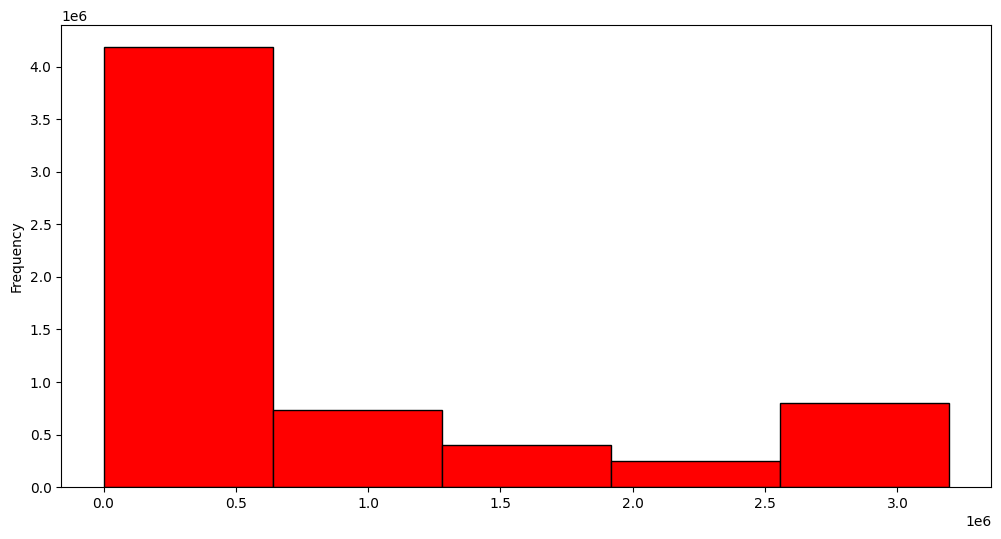

In [28]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='red',edgecolor='black')
    plt.show()

After outlier treatment

Amount ranges between 0-35 lakhs with more values ranging between 0-75,000.

OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000.

NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000.

OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000.

NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000.

#### Type

In [29]:
final_df["type"].value_counts()

type
PAYMENT     1050371
CASH_OUT     250779
CASH_IN      204805
DEBIT         28630
TRANSFER      24994
Name: count, dtype: int64

Here are the 5 different transactions 
PAYMENT , CASH_OUT , CASH_IN, DEBIT, TRANSFER

Lets visualize the transactions

<Axes: xlabel='type', ylabel='count'>

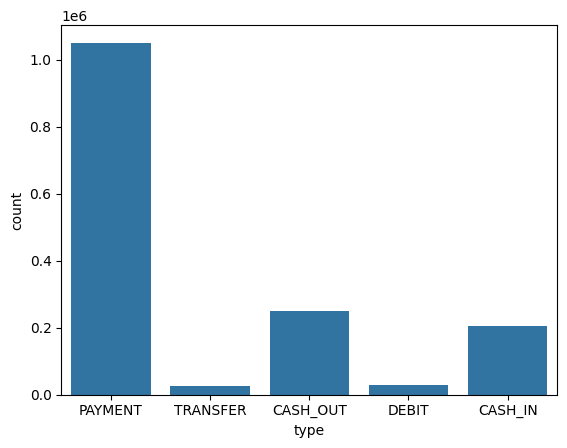

In [30]:
sns.countplot(data=final_df,x="type")

From the above chart we can see that most of the transactions.

**Now lets see how much amount each transaction holds

<Axes: xlabel='type', ylabel='amount'>

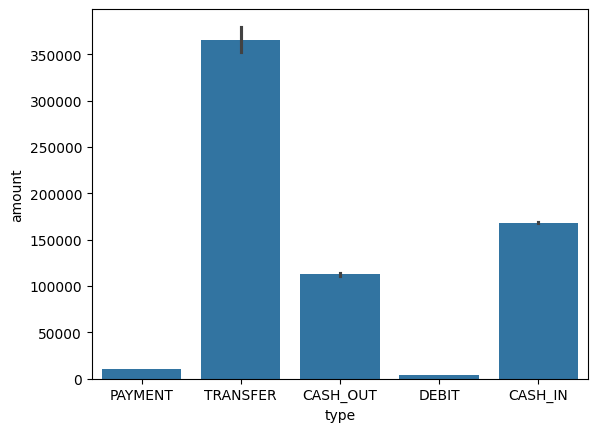

In [31]:
sns.barplot(x='type', y='amount', data=final_df)

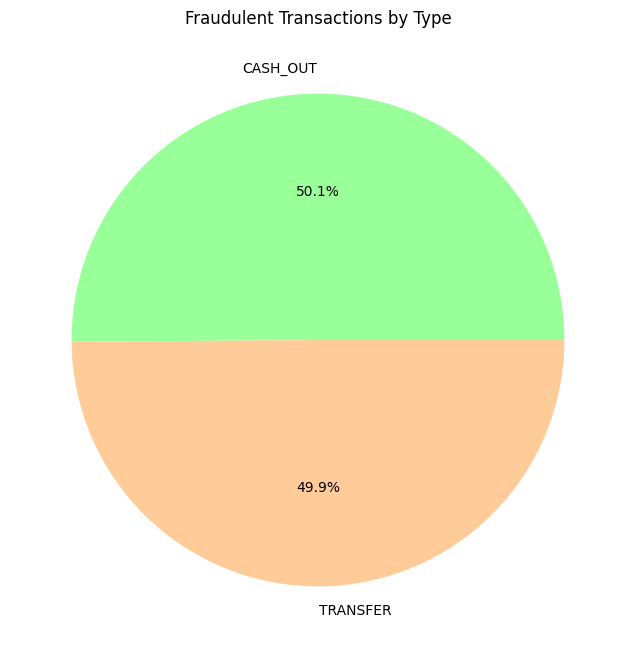

In [32]:
# Pie Chart 2: Fraudulent Transactions by Transaction Type
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fraud_by_type, labels=fraud_by_type.index, autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
plt.title('Fraudulent Transactions by Type')
plt.show()

#### Target variable value_counts

In [33]:
final_df["isFraud"].value_counts()

isFraud
0    1551366
1       8213
Name: count, dtype: int64

#### We can observe that, there is a very high bias towards Not Fraud type of transactions. We need to resample the data inorder to reduce the bias. Let's do undersampling.


In [34]:
class_counts = final_df['isFraud'].value_counts()
class_ratios = class_counts / class_counts.sum()
print("\nClass ratios:")
print(class_ratios)


Class ratios:
isFraud
0    0.994734
1    0.005266
Name: count, dtype: float64


In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in final_df.select_dtypes(include="object").columns:
    final_df[i]=le.fit_transform(final_df[i])

In [36]:
final_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
1559574,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
1559575,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
1559576,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
1559577,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [37]:
X = final_df.drop('isFraud', axis=1)
Y = final_df['isFraud']

In [38]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1559574,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
1559575,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
1559576,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
1559577,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [39]:
print("Class distribution before SMOTE:")
print(Y.value_counts(normalize=True))

Class distribution before SMOTE:
isFraud
0    0.994734
1    0.005266
Name: proportion, dtype: float64


# SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5,random_state=42)
X, Y = smote.fit_resample(X, Y)

In [41]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9.839640e+03,1.701360e+05,160296.36,0.000000,0.000000e+00,0
1,1,3,1.864280e+03,2.124900e+04,19384.72,0.000000,0.000000e+00,0
2,1,4,1.810000e+02,1.810000e+02,0.00,0.000000,0.000000e+00,0
3,1,1,1.810000e+02,1.810000e+02,0.00,21182.000000,0.000000e+00,0
4,1,3,1.166814e+04,4.155400e+04,29885.86,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...
2327044,567,1,1.394551e+06,1.394551e+06,0.00,103140.427940,1.497691e+06,0
2327045,680,1,1.440647e+05,1.440647e+05,0.00,123071.532062,2.671363e+05,0
2327046,387,1,1.400138e+05,1.400138e+05,0.00,506063.178309,6.985147e+05,0
2327047,190,1,9.607489e+04,9.607489e+04,0.00,616569.321087,7.126442e+05,0


In [42]:
print("Class distribution after SMOTE:")
print(Y.value_counts(normalize=True))

Class distribution after SMOTE:
isFraud
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [43]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X, Y = under_sampler.fit_resample(X, Y)

In [44]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
272139,46,3,6.937380e+03,1.013500e+04,3197.62,0.000000e+00,0.000000e+00,0
1429413,403,2,5.326400e+02,1.500000e+03,967.36,1.083754e+07,1.083808e+07,0
1513559,573,3,1.374130e+04,6.212800e+04,48386.70,0.000000e+00,0.000000e+00,0
89388,15,1,1.941698e+05,5.177057e+05,323535.97,0.000000e+00,1.941698e+05,0
267861,45,3,1.008169e+04,8.259300e+04,72511.31,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...
2327044,567,1,1.394551e+06,1.394551e+06,0.00,1.031404e+05,1.497691e+06,0
2327045,680,1,1.440647e+05,1.440647e+05,0.00,1.230715e+05,2.671363e+05,0
2327046,387,1,1.400138e+05,1.400138e+05,0.00,5.060632e+05,6.985147e+05,0
2327047,190,1,9.607489e+04,9.607489e+04,0.00,6.165693e+05,7.126442e+05,0


In [45]:
print("Class distribution after Undersampling:")
print(Y.value_counts(normalize=True))

Class distribution after Undersampling:
isFraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [46]:
print(Y.value_counts())

isFraud
0    775683
1    775683
Name: count, dtype: int64


In [47]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
272139,46,3,6.937380e+03,1.013500e+04,3197.62,0.000000e+00,0.000000e+00,0
1429413,403,2,5.326400e+02,1.500000e+03,967.36,1.083754e+07,1.083808e+07,0
1513559,573,3,1.374130e+04,6.212800e+04,48386.70,0.000000e+00,0.000000e+00,0
89388,15,1,1.941698e+05,5.177057e+05,323535.97,0.000000e+00,1.941698e+05,0
267861,45,3,1.008169e+04,8.259300e+04,72511.31,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...
2327044,567,1,1.394551e+06,1.394551e+06,0.00,1.031404e+05,1.497691e+06,0
2327045,680,1,1.440647e+05,1.440647e+05,0.00,1.230715e+05,2.671363e+05,0
2327046,387,1,1.400138e+05,1.400138e+05,0.00,5.060632e+05,6.985147e+05,0
2327047,190,1,9.607489e+04,9.607489e+04,0.00,6.165693e+05,7.126442e+05,0


In [48]:
X["isFraud"]=pd.DataFrame(Y)

In [49]:
for i in X.columns:
    X[i]=X[i].astype(int)

In [50]:
df_balanced=X
df_balanced=df_balanced.reset_index()

In [51]:
df_balanced.drop("index",axis=1,inplace=True)
df_balanced

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,46,3,6937,10135,3197,0,0,0,0
1,403,2,532,1500,967,10837544,10838077,0,0
2,573,3,13741,62128,48386,0,0,0,0
3,15,1,194169,517705,323535,0,194169,0,0
4,45,3,10081,82593,72511,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1551361,567,1,1394550,1394550,0,103140,1497691,0,1
1551362,680,1,144064,144064,0,123071,267136,0,1
1551363,387,1,140013,140013,0,506063,698514,0,1
1551364,190,1,96074,96074,0,616569,712644,0,1


In [52]:
correlation = df_balanced[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].corr()

In [53]:
correlation

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.828609,0.260905,0.016162,0.357411
oldbalanceOrg,0.828609,1.000000,0.752557,0.022366,0.244833
newbalanceOrig,0.260905,0.752557,1.000000,0.018712,0.002160
oldbalanceDest,0.016162,0.022366,0.018712,1.000000,0.858316
newbalanceDest,0.357411,0.244833,0.002160,0.858316,1.000000


From this, we can understand that the following columns correlate very well.

oldbalanceorg and amount,

oldbalanceorg and newbalanceOrig ,

oldbalanceDest and newbalanceDest..

#### Find the correlation of all features with the target feature

In [54]:
df_balanced['isFraud'].sort_values(ascending=False)

1551365    1
1551364    1
1551363    1
1551346    1
1551345    1
          ..
10         0
9          0
8          0
7          0
6          0
Name: isFraud, Length: 1551366, dtype: int64

Find out which type of transactions are more prone to Fraud.

<Axes: xlabel='type', ylabel='count'>

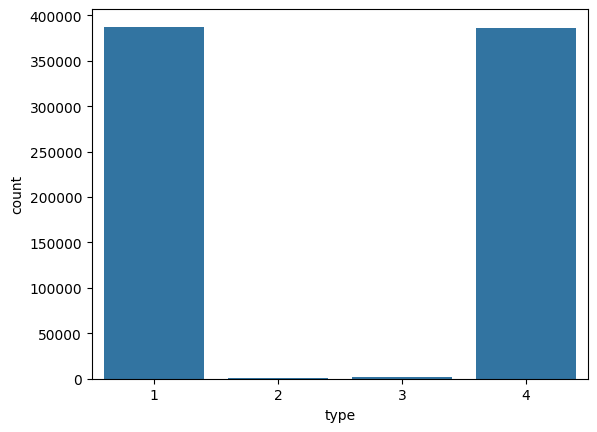

In [55]:
fraud_data = df_balanced[df_balanced['isFraud'] == 1]
legit_data = df_balanced[df_balanced['isFraud'] == 0]
sns.countplot(x='type',data=fraud_data)

It says that, transactions of type 1 and 4 i.e., `CASH_OUT` and `TRANFER` are more prone to fraud.

In [56]:
fraud_data['type'].value_counts()

type
1    387454
4    385545
3      1372
2      1312
Name: count, dtype: int64

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = df_balanced.drop(['isFraud'], axis=1)
Y = df_balanced['isFraud']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [58]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

          Feature          Score
2          amount  271008.646833
0            step  250770.699633
3   oldbalanceOrg  107856.382169
6  newbalanceDest   50368.211372
1            type   10047.756289
5  oldbalanceDest    4876.143259
7  isFlaggedFraud    1011.315510
4  newbalanceOrig     737.451664


Text(0.5, 1.0, 'Feature Importance')

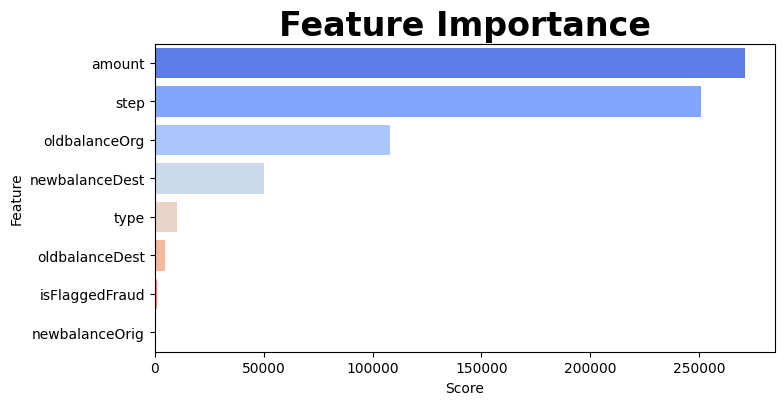

In [59]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

In [60]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

From the total of 63 lakh records only 16 were assumed and flagged as fraud, which is actually a very low number. The actual fraud happend has a very higher value when compared to isFlaggedFraud column.

In [61]:
low_score_features = featureScores[featureScores['Score'] < 2000]
print(low_score_features)

          Feature        Score
7  isFlaggedFraud  1011.315510
4  newbalanceOrig   737.451664


In [62]:
features_to_drop = ['isFlaggedFraud',"newbalanceOrig"]
df_balanced = df_balanced.drop(features_to_drop, axis=1)

In [63]:
df_balanced.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,46,3,6937,10135,0,0,0
1,403,2,532,1500,10837544,10838077,0
2,573,3,13741,62128,0,0,0
3,15,1,194169,517705,0,194169,0
4,45,3,10081,82593,0,0,0


We don't need the columns `isFlaggedFraud` and newbalanceOrig as these are columns after a transaction happens. 

### Split the data into input and target datasets.

In [64]:
# Splitting data into features (X) and outcomes (y)
X = df_balanced.drop(["isFraud"], axis=1)
Y = df_balanced["isFraud"]

In [65]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((1241092, 6), (310274, 6), (1241092,), (310274,))

## Standardization


Use StandardScaler() to standardize the features.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [69]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])
from sklearn import metrics
def updateScoreCardTrain(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision Score': [metrics.precision_score(Y_train, train_pred)],
        'Recall Score': [metrics.recall_score(Y_train, train_pred)],
        'Accuracy Score': [metrics.accuracy_score(Y_train, train_pred)],
        'f1-score': [metrics.f1_score(Y_train, train_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [70]:
def updateScoreCardTest(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision Score': [metrics.precision_score(Y_test, test_pred)],
        'Recall Score': [metrics.recall_score(Y_test, test_pred)],
        'Accuracy Score': [metrics.accuracy_score(Y_test, test_pred)],
        'f1-score': [metrics.f1_score(Y_test, test_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [71]:
from sklearn.linear_model import  LogisticRegression

In [72]:
# Fitting the Model
LrModel=LogisticRegression()

LrModel.fit(X_train,Y_train)

# Model Predict
train_pred=LrModel.predict(X_train)
test_pred=LrModel.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'LogisticRegressionTrain')
score_card = updateScoreCardTest(score_card, 'LogisticRegressionTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401


## 4.2 Decision Tree Model

In [73]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()

# Fitting the Model
DCT.fit(X_train,Y_train)
# Model Predict
train_pred=DCT.predict(X_train)
test_pred=DCT.predict(X_test)


score_card = updateScoreCardTrain(score_card, 'DecisionTreeTrain')
score_card = updateScoreCardTest(score_card, 'DecisionTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556


## 4.3 Random Forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=30,random_state=42, n_jobs=-1, oob_score=True)
rfc.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'RandomForestTrain')
score_card = updateScoreCardTest(score_card, 'RandomForestTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556
4,RandomForestTrain,0.999987,1.000000,0.999994,0.999994
5,RandomForestTest,0.996831,0.999730,0.998272,0.998278


### ExtraTreesClassifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)

train_pred=model_ExtraTrees.predict(X_train)
test_pred=model_ExtraTrees.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'ExtraTreeTrain')
score_card = updateScoreCardTest(score_card, 'ExtraTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556
4,RandomForestTrain,0.999987,1.000000,0.999994,0.999994
5,RandomForestTest,0.996831,0.999730,0.998272,0.998278
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.995322,0.999414,0.997354,0.997364


### Ada Boost Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with the correct parameter for scikit-learn 1.3.2
model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),  # use 'estimator' instead of 'base_estimator'
    n_estimators=70,
    random_state=10
)

# Train the model
model_AdaBoost.fit(X_train, Y_train)

# Predictions
train_pred = model_AdaBoost.predict(X_train)
test_pred = model_AdaBoost.predict(X_test)

# Update score card
score_card = updateScoreCardTrain(score_card, 'AdaBoostTrain')
score_card = updateScoreCardTest(score_card, 'AdaBoostTest')

# Display updated score card
score_card


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556
4,RandomForestTrain,0.999987,1.000000,0.999994,0.999994
5,RandomForestTest,0.996831,0.999730,0.998272,0.998278
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.995322,0.999414,0.997354,0.997364
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998226,0.999054,0.998637,0.998640


### XGB Classifier

In [77]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=80,
                              random_state=10)

model_XGBoost.fit(X_train,Y_train)
train_pred=model_XGBoost.predict(X_train)
test_pred=model_XGBoost.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'XGBoostTrain')
score_card = updateScoreCardTest(score_card, 'XGBoostTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556
4,RandomForestTrain,0.999987,1.000000,0.999994,0.999994
5,RandomForestTest,0.996831,0.999730,0.998272,0.998278
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.995322,0.999414,0.997354,0.997364
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998226,0.999054,0.998637,0.998640


In [105]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train best model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Save model and scaler with joblib
joblib.dump(model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully with joblib!")


✅ Model and Scaler saved successfully with joblib!


In [83]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Save trained model
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Random Forest model and Scaler saved successfully!")


✅ Random Forest model and Scaler saved successfully!


In [84]:
df_balanced.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

### 4.4 Deep Learing Models

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [86]:
model = Sequential()

In [87]:
X_train.shape,Y_train.shape

((1241092, 6), (1241092,))

In [88]:
# building a linear stack of layers with the sequential model
model = Sequential()


# hidden layer
model.add(Dense(128,activation = "relu", input_dim=5)) # input connected
model.add(Dense(64, activation = 'relu')) # hidden
model.add(Dense(32, activation = 'relu'))# Hidden
model.add(Dense(16, activation = 'relu'))#Hidden


# output layer
model.add(Dense(1, activation = "sigmoid"))

In [89]:
# looking at the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

num_features = X_train.shape[1]  # get number of features automatically

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(num_features,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
model.compile(
    optimizer='adam',           # Adam optimizer
    loss='binary_crossentropy', # for binary classification
    metrics=['accuracy']        # you can add more metrics if needed
)

# Early stopping callback
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
h_callback = model.fit(
    X_train, Y_train,
    batch_size=16,
    epochs=2,
    validation_data=(X_test, Y_test),
    callbacks=[earlystopping]
)


Epoch 1/2
77569/77569 ━━━━━━━━━━━━━━━━━━━━ 224s 3ms/step - accuracy: 0.9558 - loss: 0.1084 - val_accuracy: 0.9844 - val_loss: 0.0437
Epoch 2/2
77569/77569 ━━━━━━━━━━━━━━━━━━━━ 219s 3ms/step - accuracy: 0.9818 - loss: 0.0497 - val_accuracy: 0.9879 - val_loss: 0.0402


In [91]:
test_pred = model.predict(X_test)
test_pred = np.round(test_pred)
train_pred=model.predict(X_train)
train_pred = np.round(train_pred)
score_card = updateScoreCardTrain(score_card, 'ANNTrain')
score_card = updateScoreCardTest(score_card, 'ANNTest')
score_card

9697/9697 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
38785/38785 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.919754,0.806872,0.868297,0.859623
1,LogisticRegressionTest,0.919854,0.808167,0.868635,0.860401
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998148,0.998964,0.998553,0.998556
4,RandomForestTrain,0.999987,1.000000,0.999994,0.999994
5,RandomForestTest,0.996831,0.999730,0.998272,0.998278
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.995322,0.999414,0.997354,0.997364
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998226,0.999054,0.998637,0.998640


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551366 entries, 0 to 1551365
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   step            1551366 non-null  int64
 1   type            1551366 non-null  int64
 2   amount          1551366 non-null  int64
 3   oldbalanceOrg   1551366 non-null  int64
 4   oldbalanceDest  1551366 non-null  int64
 5   newbalanceDest  1551366 non-null  int64
dtypes: int64(6)
memory usage: 71.0 MB


In [93]:
import pickle

In [94]:
filename='new_trained_model.sav'
pickle.dump(model_XGBoost,open(filename,'wb'))

In [95]:
loaded_model=pickle.load(open('new_trained_model.sav','rb'))

In [96]:
import sklearn
print(sklearn.__version__)

1.7.1


In [97]:
for i in X.columns:
    print(X[i].value_counts())

step
19     7630
187    7179
259    6971
307    6873
18     6840
       ... 
739     146
740      98
741      94
742      25
743       8
Name: count, Length: 743, dtype: int64
type
3    526383
1    510874
4    396070
0    102362
2     15677
Name: count, dtype: int64
amount
10000000    26491
0             322
63             94
1165187        83
164            82
            ...  
1531429         1
624845          1
807297          1
1736346         1
3353477         1
Name: count, Length: 615697, dtype: int64
oldbalanceOrg
10000000    13000
0            1881
1165187        83
429257         80
32382          70
            ...  
637398          1
2198884         1
2695519         1
14979775        1
484422          1
Name: count, Length: 727314, dtype: int64
oldbalanceDest
0          1133746
1               67
2               63
3               38
180             21
            ...   
7110657          1
69613            1
5473285          1
654928           1
934947           1
Name: co

In [98]:
X

,step,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest
0,46,3,6937,10135,0,0
1,403,2,532,1500,10837544,10838077
2,573,3,13741,62128,0,0
3,15,1,194169,517705,0,194169
4,45,3,10081,82593,0,0
...,...,...,...,...,...,...
1551361,567,1,1394550,1394550,103140,1497691
1551362,680,1,144064,144064,123071,267136
1551363,387,1,140013,140013,506063,698514
1551364,190,1,96074,96074,616569,712644


In [99]:
df_balanced.tail(30)

,step,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
1551336,457,1,544112,544112,0,544112,1
1551337,327,1,557660,557660,5473285,6030946,1
1551338,193,1,911308,911308,69613,980922,1
1551339,282,4,335657,335657,0,0,1
1551340,290,1,46516,46516,1395,47911,1
1551341,143,4,1736346,1736346,0,0,1
1551342,407,1,43380,43380,0,43380,1
1551343,464,4,807297,807297,0,0,1
1551344,78,1,244006,244006,7110657,7354663,1
1551345,615,1,23348,23348,337436,360785,1


In [101]:
import joblib
# Save the trained model
joblib.dump(rfc, "fraud_model.pkl")
print("✅ Random Forest model saved as fraud_model.pkl")


✅ Random Forest model saved as fraud_model.pkl


In [102]:


model = joblib.load(r"C:\Users\John\Downloads\Online_Fraud_payment_Detection_C_P-2\fraud_model.pkl")
print("Expected n_features_in_:", model.n_features_in_)


Expected n_features_in_: 6
